## CREDIT RISK ANALYSIS
Predict for a consumer finance company which specialises in lending various types of loans to urban customers, that the applicants capable of repaying the loan are not rejected.

In [79]:
# Import all necessary the packages 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as plyx
import plotly.figure_factory as plyff
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [83]:
# Load the Dataset

In [85]:
data = pd.read_csv("loan_prediction.csv")

# A. Data Understanding and Preprocessing

In [88]:
print(data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [90]:
print(data.describe())  # Summary statistics for numerical features

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [92]:
print(data.isnull().sum())  # Check for missing values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [94]:
# Handle missing values
# For simplicity, we can use the median for continuous features and the mode for categorical features.
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

C:\Users\RAJASEA\AppData\Local\Temp\ipykernel_3600\1105000246.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\RAJASEA\AppData\Local\Temp\ipykernel_3600\1105000246.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [96]:
print(data.isnull().sum()) # check after replacing nan values with mode or median

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [98]:
#Checking for value & counts
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


# B .Exploratory Data Analysis

C:\Users\RAJASEA\AppData\Local\Temp\ipykernel_3600\3814728219.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




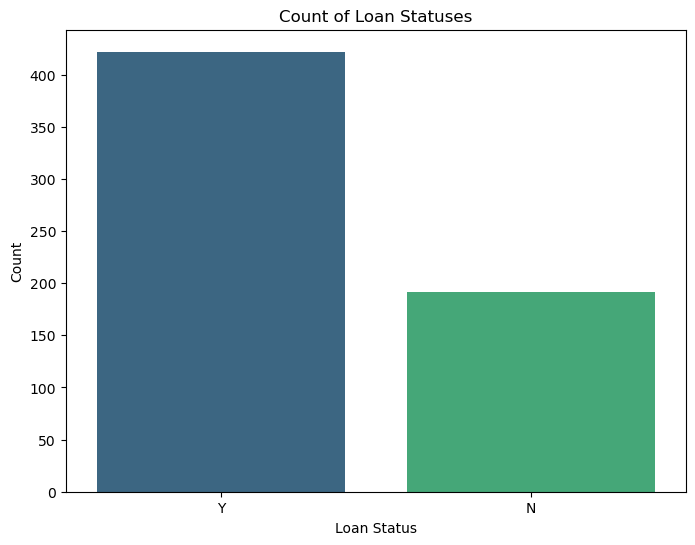

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Loan_Status', palette='viridis')

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Count of Loan Statuses')
plt.show()

<Figure size 1500x1000 with 0 Axes>

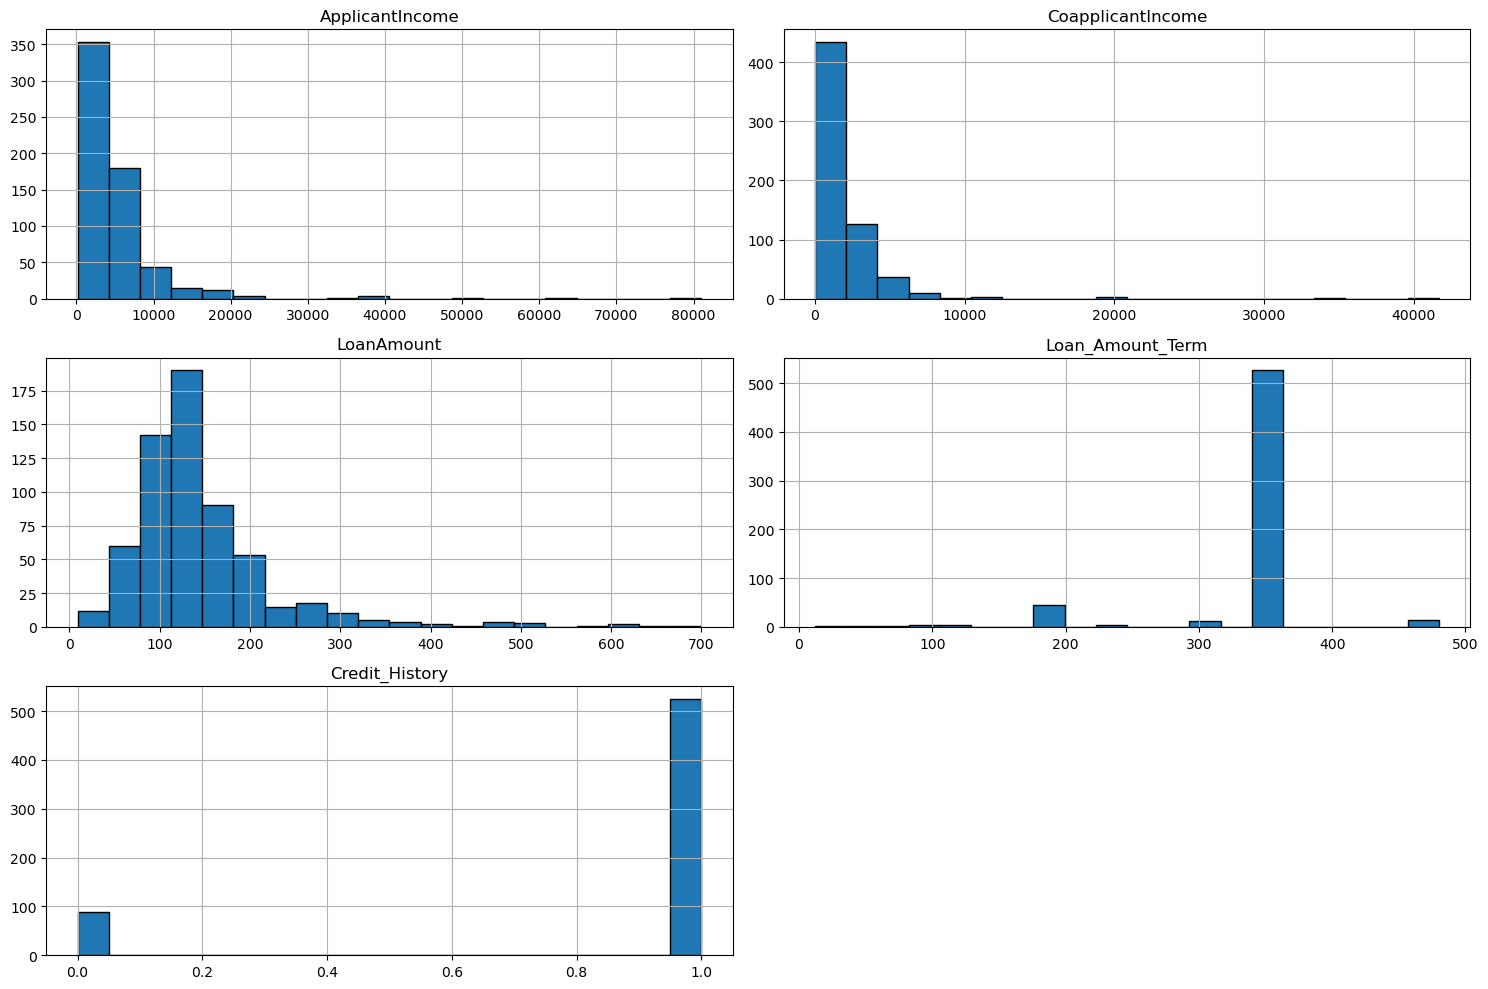

In [103]:
# Plot distribution of each feature
plt.figure(figsize=(15, 10))
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

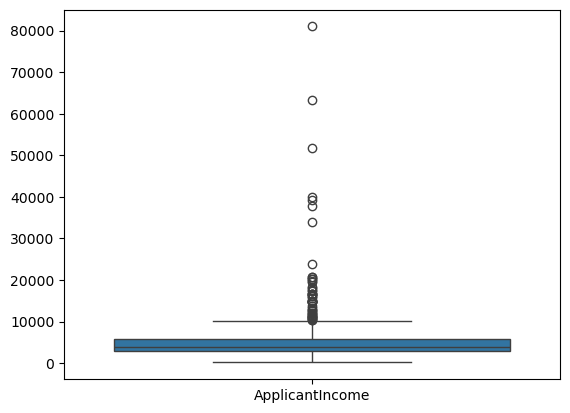

In [105]:
# Boxplot for ApplicantIncome and LoanAmount to check for outliers
#plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['ApplicantIncome']])
plt.show()

#### There are outliers in the applicant income .Also the data is not normalized

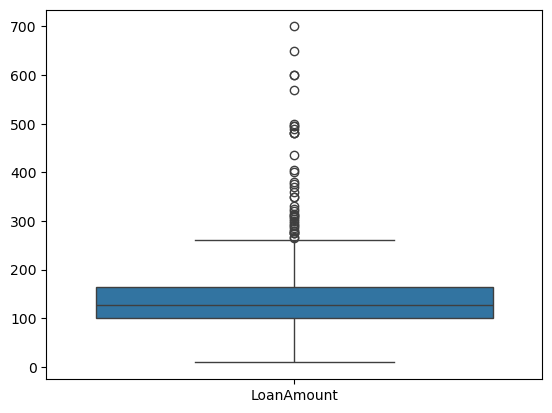

In [108]:
#plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['LoanAmount']])
plt.show()

#### There are outliers in the Loan Amount .Also the data is not normalized.Co-applicant income also needs to be normalized


In [111]:
#Looking for correlation between ApplicantIncome and LoanAmount, CoapplicantIncome and LoanAmount.

In [113]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Correlation Matrix:
                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565181   
CoapplicantIncome        -0.116605           1.000000    0.189218   
LoanAmount                0.565181           0.189218    1.000000   
Loan_Amount_Term         -0.046531          -0.059383    0.036960   
Credit_History           -0.018615           0.011134   -0.000607   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.046531       -0.018615  
CoapplicantIncome         -0.059383        0.011134  
LoanAmount                 0.036960       -0.000607  
Loan_Amount_Term           1.000000       -0.004705  
Credit_History            -0.004705        1.000000  


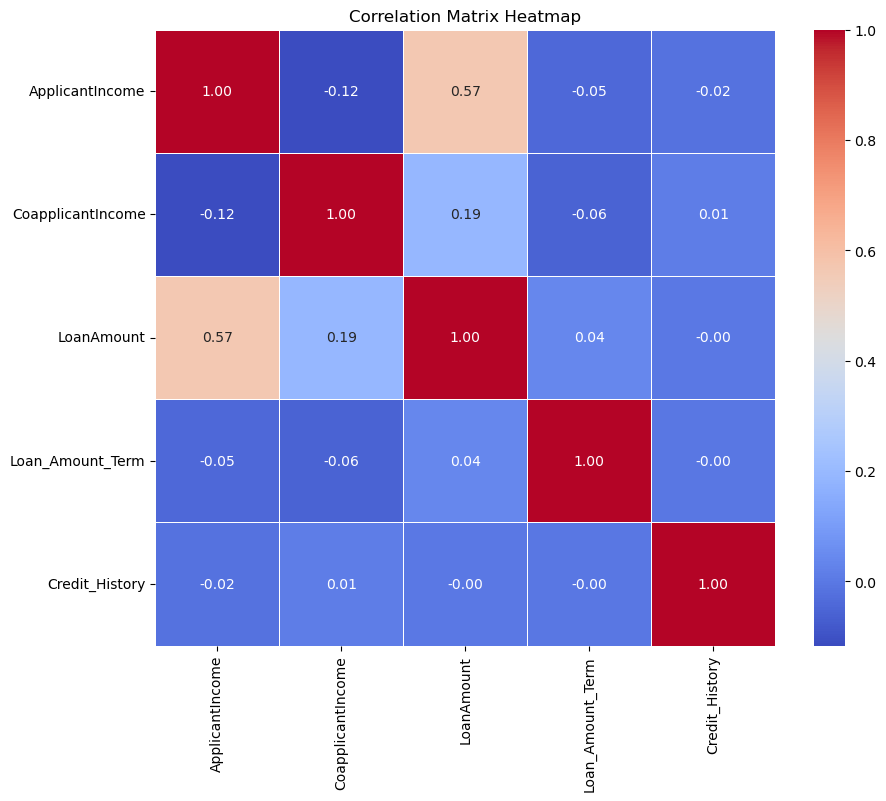

In [115]:
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Inference of Numerical Data Analysis: 
#### 1.The applicant income seems to be positively correlated with the loan amount and co-applicant income and loan amount
#### 2.The applications for more than 66% have been approved .This would also mean that the data is skewed.We will have to correct the data by either upsampling or downsampling
#### 3. The Loan Amount,Applicant and Co-applicant Income are not normally distributed.The data will have to be normalized


In [118]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

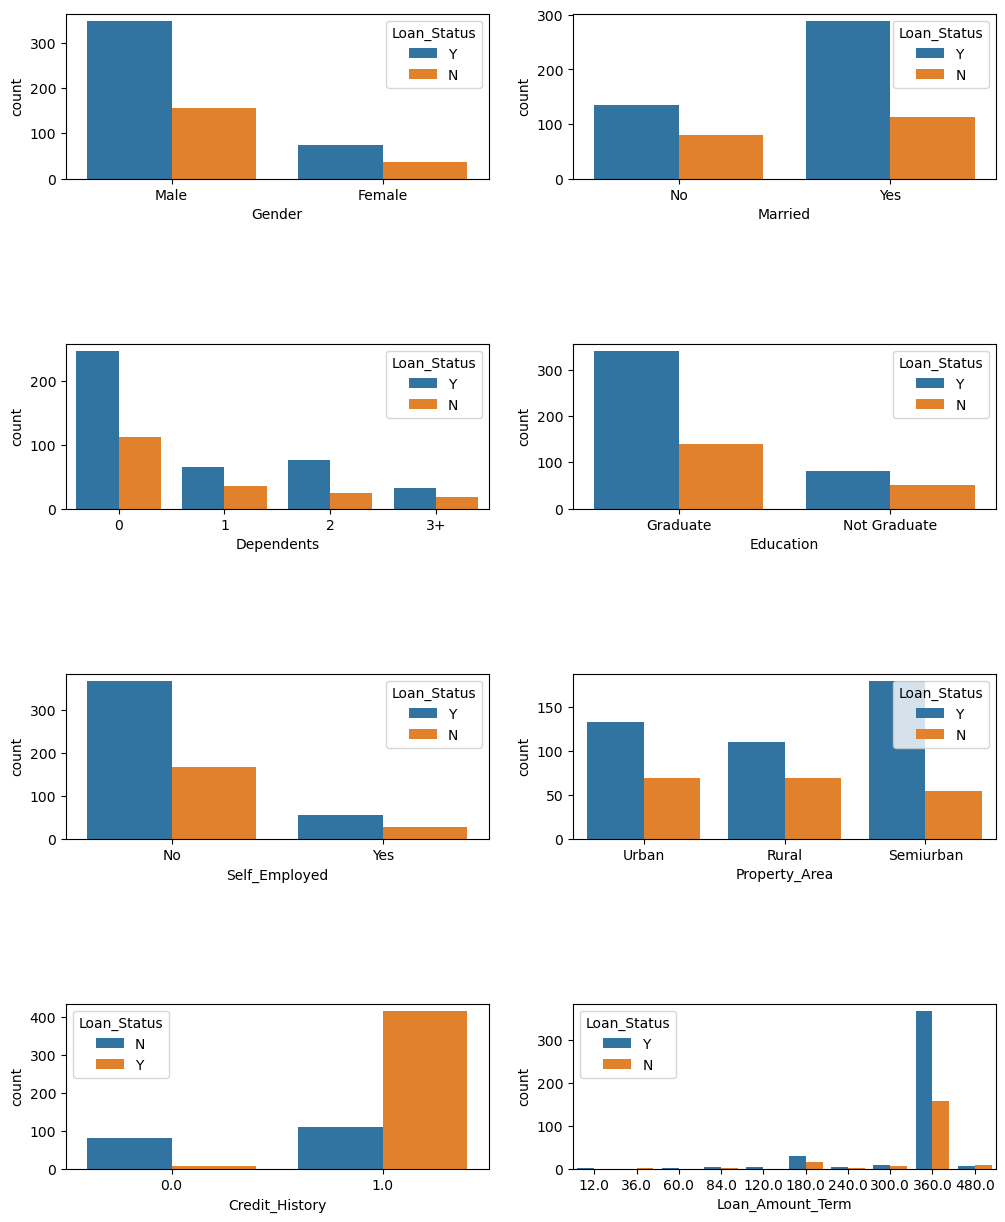

In [120]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

### Inferences from Categorical Variables Analysis
##### More loans given to Male.
##### More loans given to Married
##### More chances of loan approval for applications with 0 dependants

In [123]:
#Data Pre-Processing

In [125]:
# Encode categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


In [129]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


<Axes: >

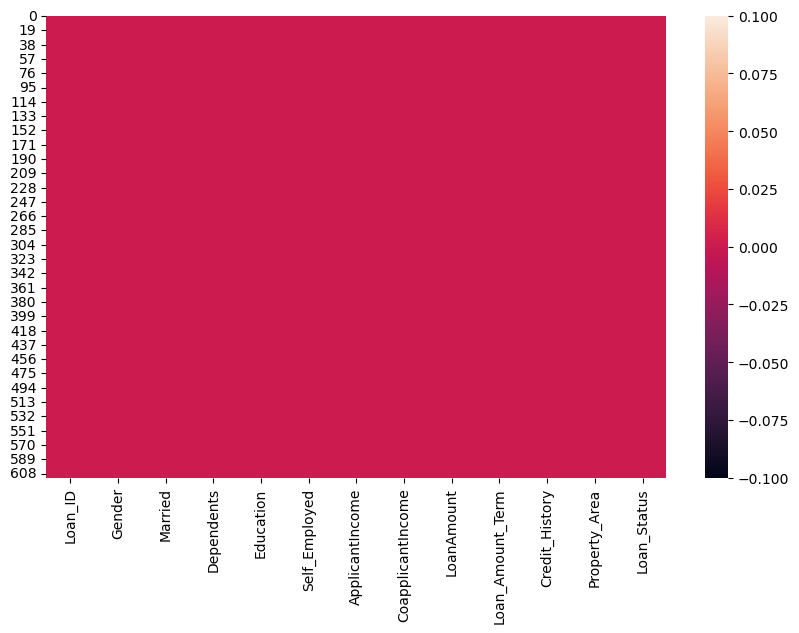

In [131]:
#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())


In [133]:
#Treating outliers and Converting data to Normal Distribution
#Before removing outlier

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  2500
CoapplicantIncome:  0.0
LoanAmount:  128.0

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.064856533888
CoapplicantIncome:  2923.8644597700627
LoanAmount:  84.03871423798938


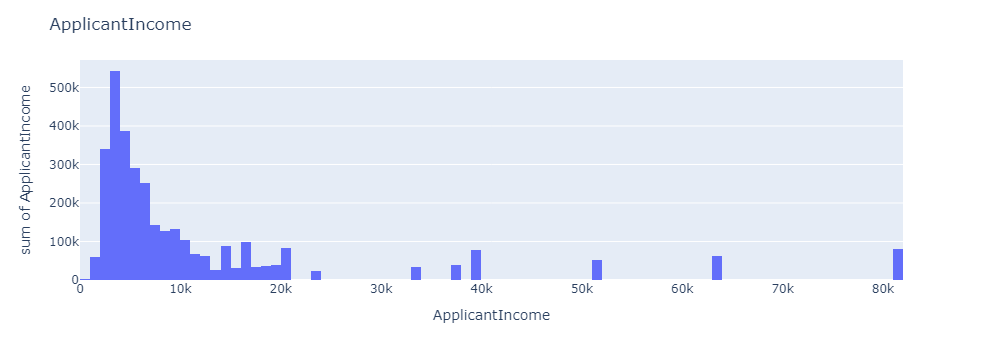

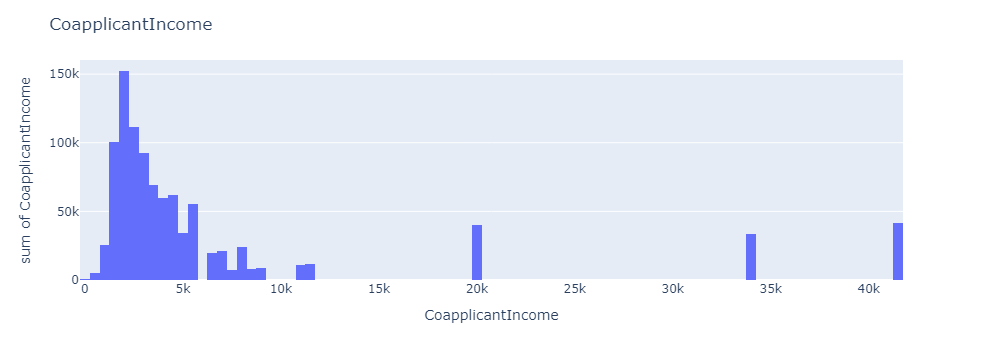

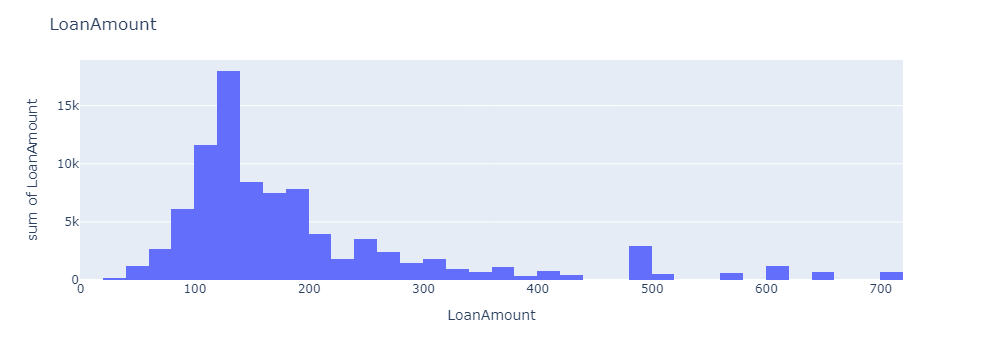

In [135]:
fig = plyx.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = plyx.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = plyx.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

In [137]:
#Normalizing using log
data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])

In [139]:
print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))


---------------------------After converting to Normal Distributed data----------------------

Mean:->

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857250194811088

Mode:->

ApplicantIncome:  7.824046010856292
CoapplicantIncome:  0.0
LoanAmount:  4.852030263919617

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521025
CoapplicantIncome:  3.8725225987499146
LoanAmount:  0.49559166063018056


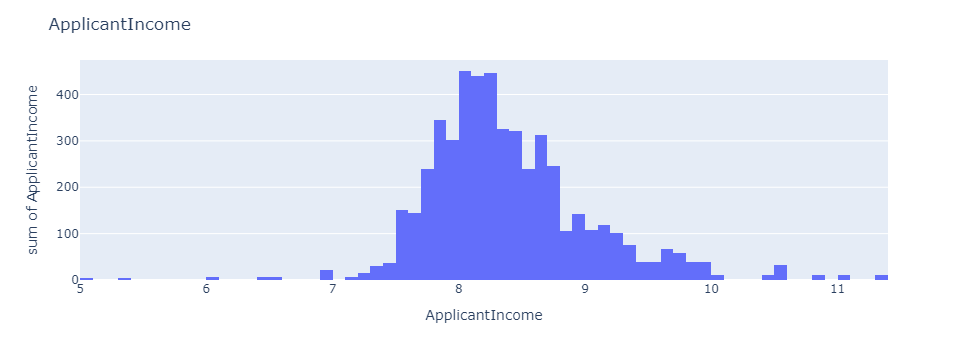

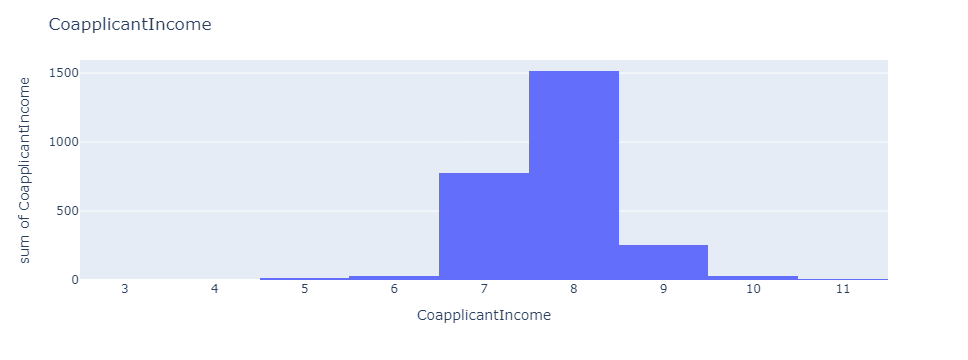

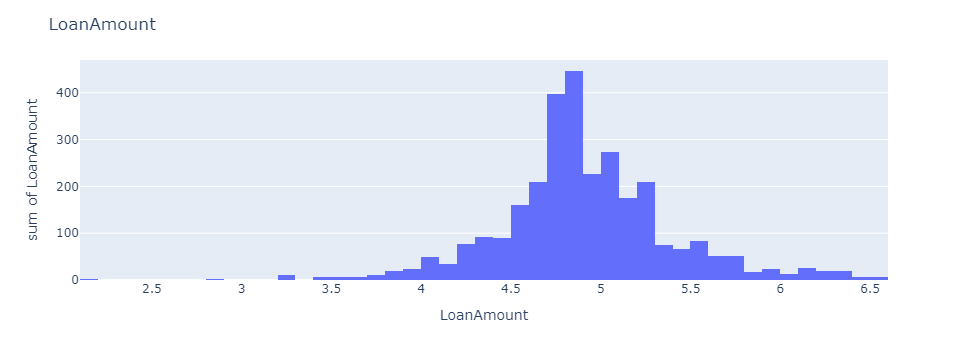

<Figure size 1000x400 with 0 Axes>

In [141]:
plt.figure(figsize=(10,4))
fig = plyx.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = plyx.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = plyx.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

We have achieved normal distribution bell curve after normalizing the data

### Feature Engineering

In [145]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


In [147]:
# Separate features and target variable
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

##### XGBoost Feature Importance

Gender -> 0.023329593
Married -> 0.043940842
Dependents -> 0.03970982
Education -> 0.05890409
Self_Employed -> 0.047676113
ApplicantIncome -> 0.0486292
CoapplicantIncome -> 0.054745004
LoanAmount -> 0.049085066
Loan_Amount_Term -> 0.051258586
Credit_History -> 0.5376038
Property_Area -> 0.04511782


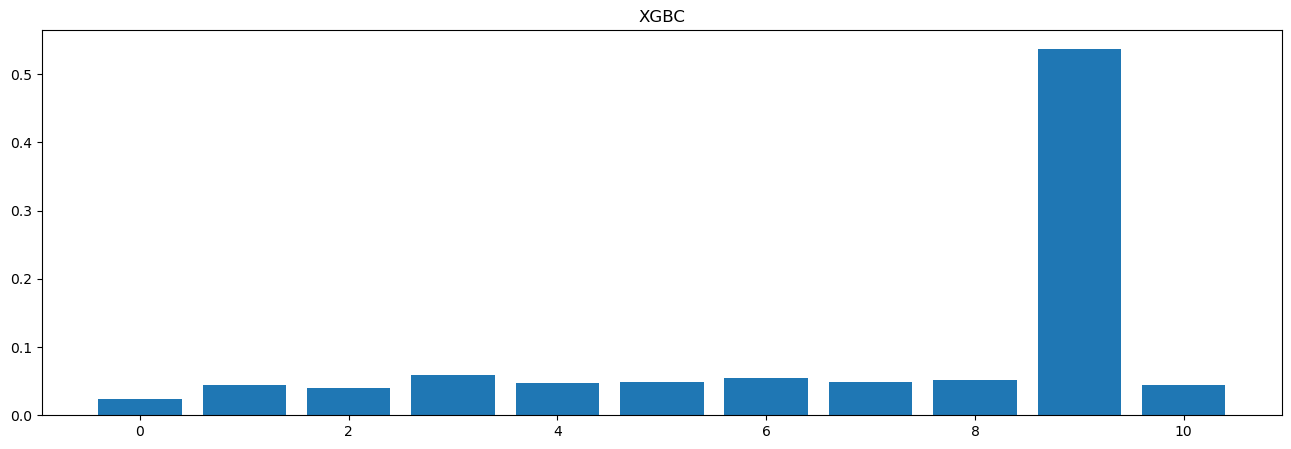

In [156]:

XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

##### Feature Identification by SVM

Gender -> -0.010953397721124247
Married -> 0.016406595058583662
Dependents -> -0.0005067598613486268
Education -> -0.007851895995125702
Self_Employed -> -0.003769851809680702
ApplicantIncome -> 0.00957159072564373
CoapplicantIncome -> 0.0010055129557464682
LoanAmount -> -0.01308036196283524
Loan_Amount_Term -> 9.033492642629426e-05
Credit_History -> 2.0817089700397062
Property_Area -> -0.0004230371335864902


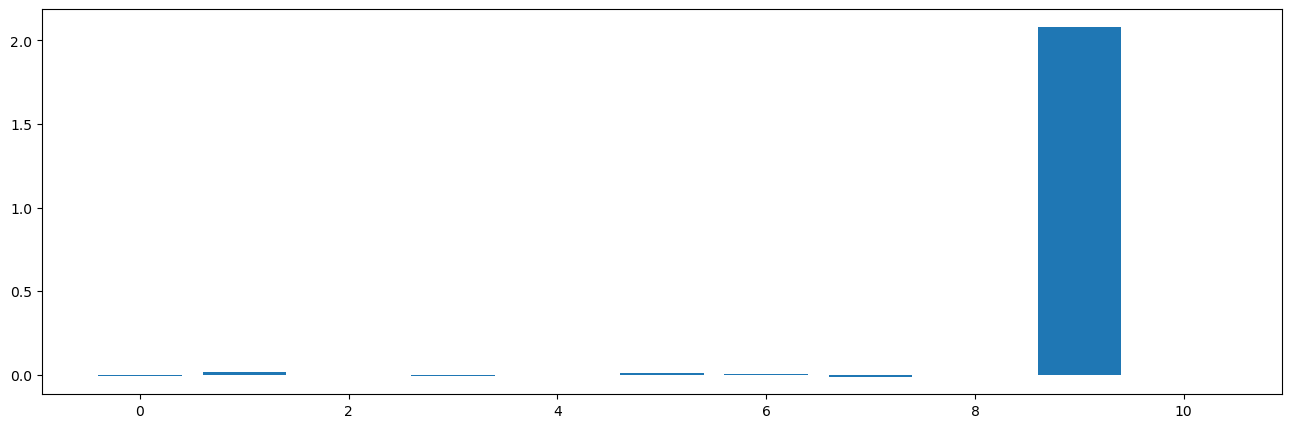

In [159]:
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

##### The most important features seems to be Credit History , ApplicantIncome , CoapplicantIncome, LoanAmount

##### Handling the skewness in data since the Approved status is way more than rejected

In [167]:
count_approved = list(data.Loan_Status).count(1)
count_rejected = list(data.Loan_Status).count(0)
print("Approved :",count_approved,"\nRejected : ",count_rejected)

Approved : 422 
Rejected :  192


In [175]:
#Tcopying the data to keep the original as it is
from sklearn.utils import resample
data_copy = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_copy[data_copy.Loan_Status==1]
df_minority = data_copy[data_copy.Loan_Status==0]

#downsampling

df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled counts:\n",df_downsampled.Loan_Status.value_counts())

#upsampling 
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled counts:\n",df_upsampled.Loan_Status.value_counts())

Downsampled counts:
 Loan_Status
1    192
0    192
Name: count, dtype: int64
Upsampled counts:
 Loan_Status
1    422
0    422
Name: count, dtype: int64


# C .Model Development

#### 1. With original data


In [179]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import metrics

In [181]:
# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN Classifier': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Performance:
Accuracy: 0.8292682926829268
Precision: 0.822429906542056
Recall: 0.9777777777777777
F1 Score: 0.8934010152284264


KNN Classifier Performance:
Accuracy: 0.7804878048780488
Precision: 0.8181818181818182
Recall: 0.9
F1 Score: 0.8571428571428571


Support Vector Machine Performance:
Accuracy: 0.7317073170731707
Precision: 0.7317073170731707
Recall: 1.0
F1 Score: 0.8450704225352113


Decision Tree Performance:
Accuracy: 0.6341463414634146
Precision: 0.7647058823529411
Recall: 0.7222222222222222
F1 Score: 0.7428571428571429


Bagging Classifier Performance:
Accuracy: 0.7642276422764228
Precision: 0.8588235294117647
Recall: 0.8111111111111111
F1 Score: 0.8342857142857143


Gradient Boosting Performance:
Accuracy: 0.8211382113821138
Precision: 0.8333333333333334
Recall: 0.9444444444444444
F1 Score: 0.8854166666666666


AdaBoost Classifier Performance:
Accuracy: 0.8292682926829268
Precision: 0.8415841584158416
Recall: 0.9444444444444444
F1 Score: 0.89005235602

C:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



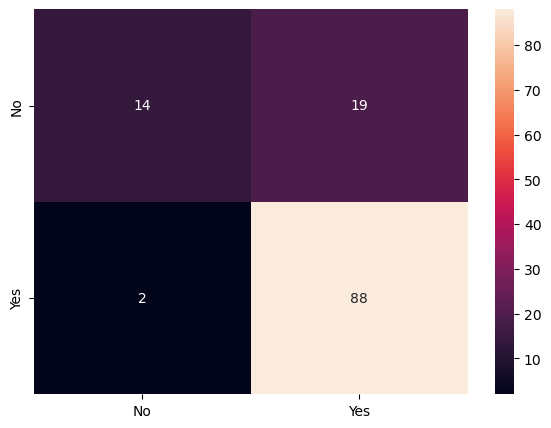

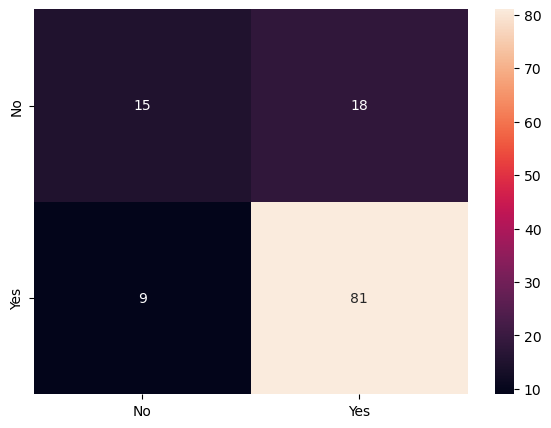

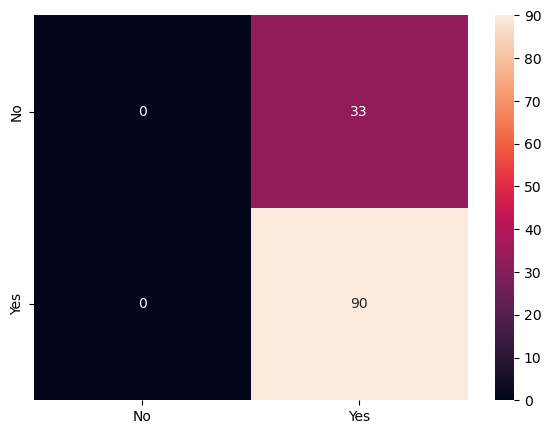

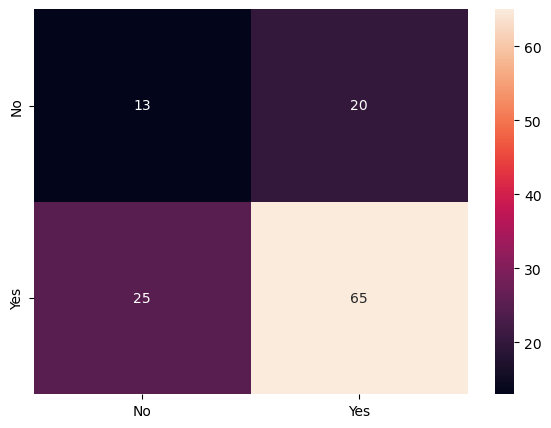

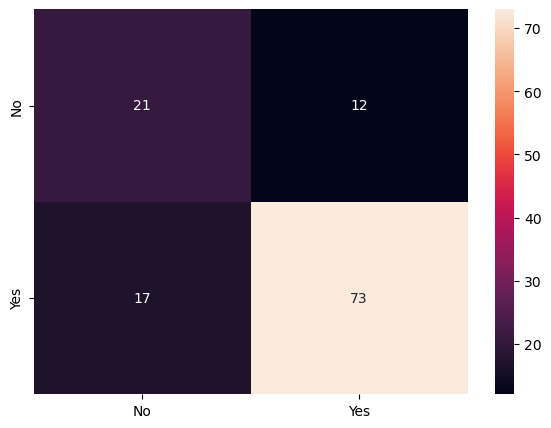

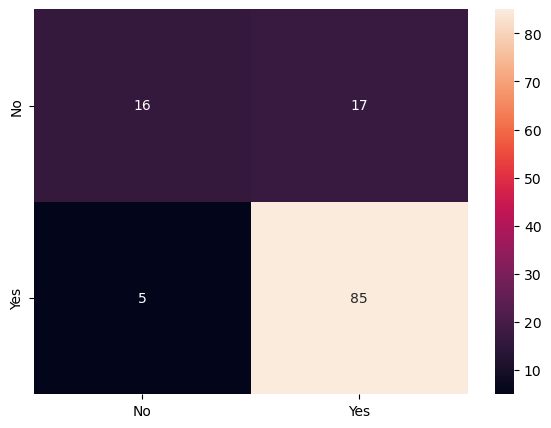

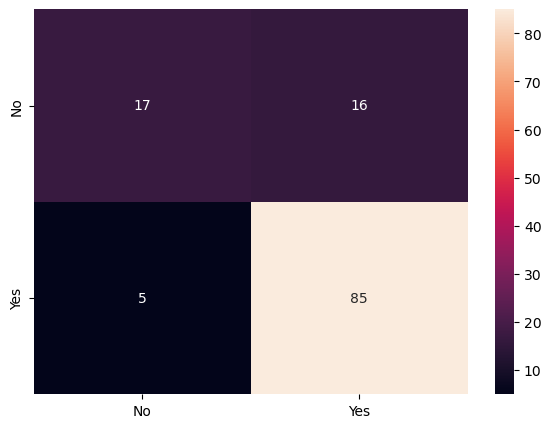

In [183]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    print("\n")

##### 2. With Scaled Data

In [188]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

After Standardization
Mean  1.3813550685948994e-17 Standard Deviation  1.0 



Logistic Regression Performance:
Accuracy: 0.8292682926829268
Precision: 0.822429906542056
Recall: 0.9777777777777777
F1 Score: 0.8934010152284264


KNN Classifier Performance:
Accuracy: 0.7723577235772358
Precision: 0.81
Recall: 0.9
F1 Score: 0.8526315789473684


Support Vector Machine Performance:
Accuracy: 0.8292682926829268
Precision: 0.822429906542056
Recall: 0.9777777777777777
F1 Score: 0.8934010152284264


Decision Tree Performance:
Accuracy: 0.6097560975609756
Precision: 0.7837837837837838
Recall: 0.6444444444444445
F1 Score: 0.7073170731707317


Bagging Classifier Performance:
Accuracy: 0.6991869918699187
Precision: 0.8045977011494253
Recall: 0.7777777777777778
F1 Score: 0.7909604519774012


Gradient Boosting Performance:
Accuracy: 0.8211382113821138
Precision: 0.84
Recall: 0.9333333333333333
F1 Score: 0.8842105263157894




C:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost Classifier Performance:
Accuracy: 0.8211382113821138
Precision: 0.84
Recall: 0.9333333333333333
F1 Score: 0.8842105263157894




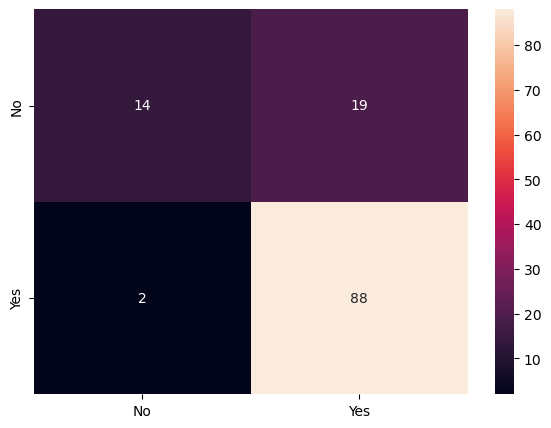

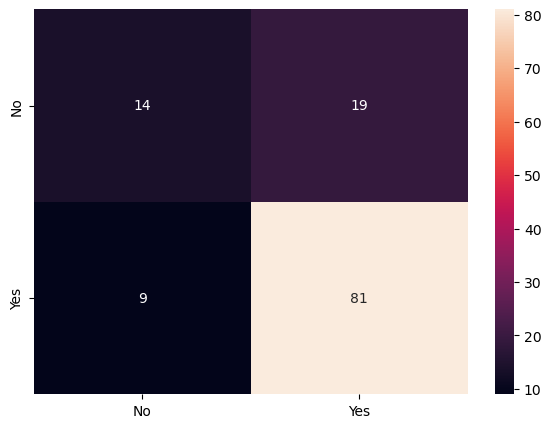

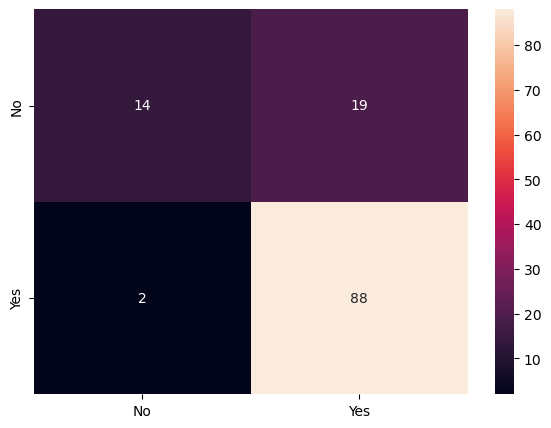

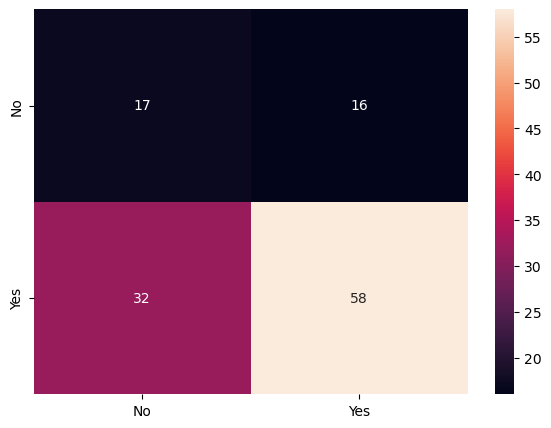

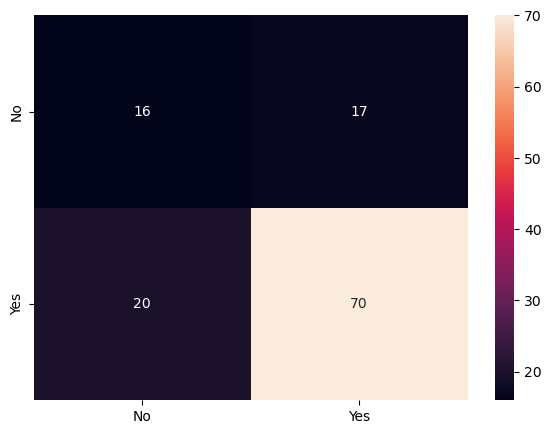

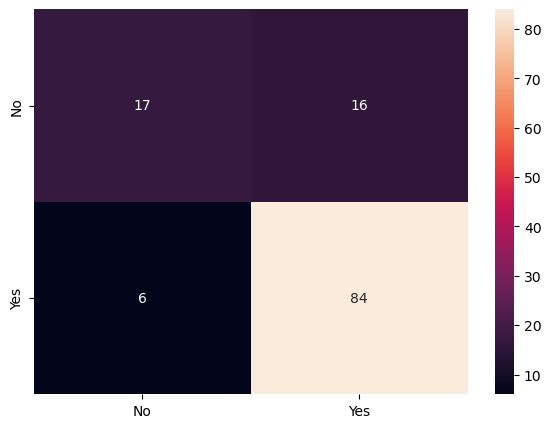

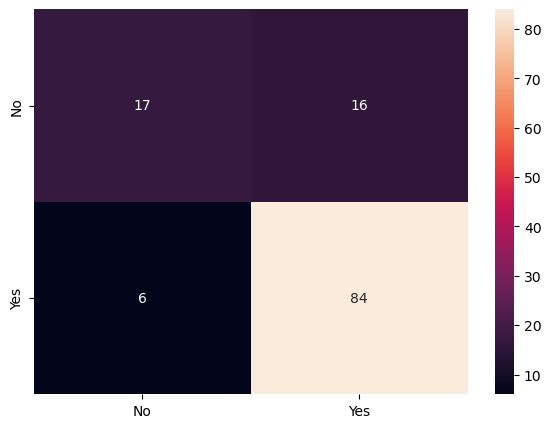

In [190]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    print("\n")

##### 3. Scaled & Downsampled data

In [197]:
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

After Standardization
Mean  -3.064327691705293e-16 Standard Deviation  1.0 



Logistic Regression Performance:
Accuracy: 0.6770833333333334
Precision: 0.639344262295082
Recall: 0.8125
F1 Score: 0.7155963302752294


KNN Classifier Performance:
Accuracy: 0.6875
Precision: 0.640625
Recall: 0.8541666666666666
F1 Score: 0.7321428571428571


Support Vector Machine Performance:
Accuracy: 0.6979166666666666
Precision: 0.6557377049180327
Recall: 0.8333333333333334
F1 Score: 0.7339449541284404


Decision Tree Performance:
Accuracy: 0.6979166666666666
Precision: 0.6862745098039216
Recall: 0.7291666666666666
F1 Score: 0.7070707070707071


Bagging Classifier Performance:
Accuracy: 0.6875
Precision: 0.6551724137931034
Recall: 0.7916666666666666
F1 Score: 0.7169811320754716


Gradient Boosting Performance:
Accuracy: 0.65625
Precision: 0.6271186440677966
Recall: 0.7708333333333334
F1 Score: 0.6915887850467289


AdaBoost Classifier Performance:
Accuracy: 0.7395833333333334
Precision: 0.6825396825396826
Recall: 0.8958333333333334
F1 Score: 0.7747747747747747


C:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



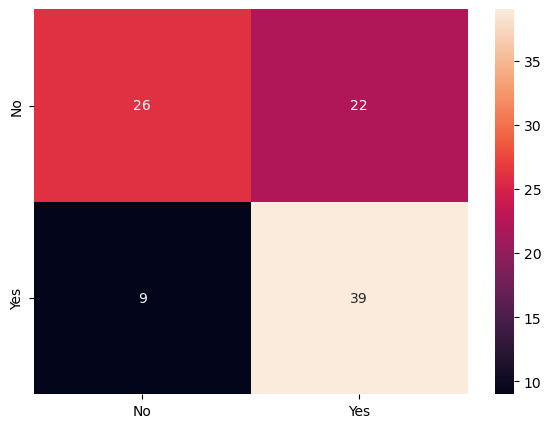

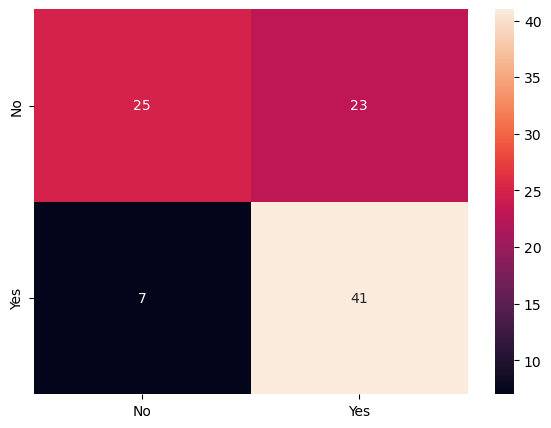

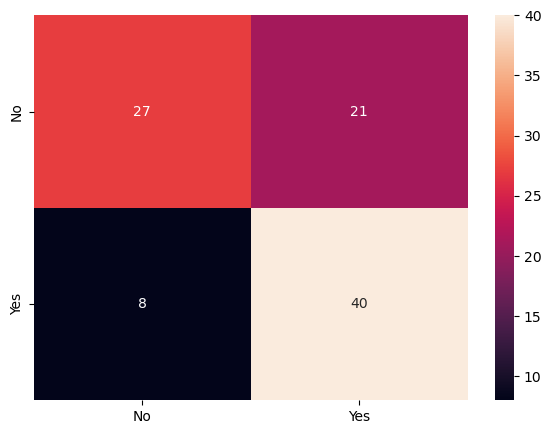

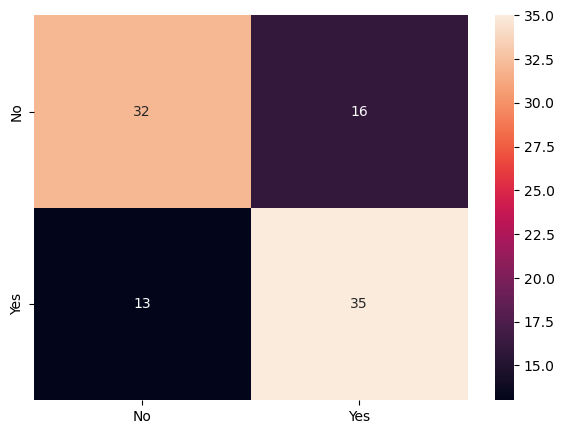

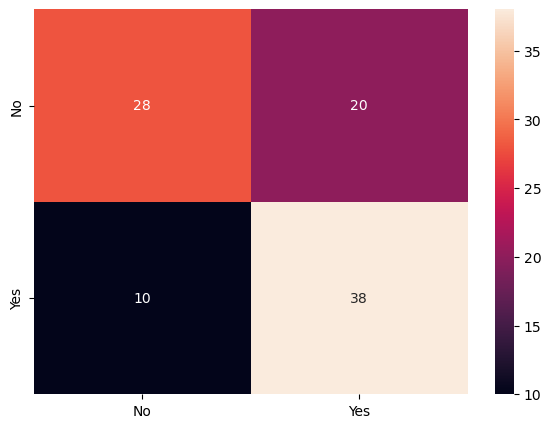

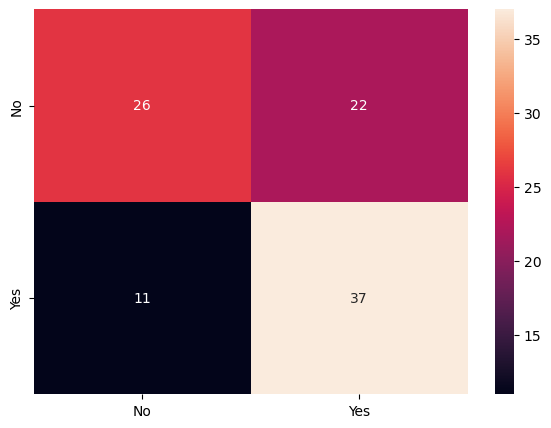

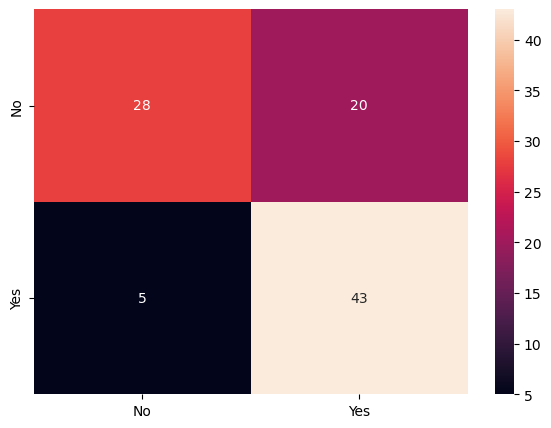

In [199]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    print("\n")

##### 4. Scaled & Upsampled data

In [202]:
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)
#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

844 844
After Standardization
Mean  7.143184188310644e-17 Standard Deviation  1.0 



Logistic Regression Performance:
Accuracy: 0.6587677725118484
Precision: 0.6040268456375839
Recall: 0.8737864077669902
F1 Score: 0.7142857142857143


KNN Classifier Performance:
Accuracy: 0.6966824644549763
Precision: 0.7010309278350515
Recall: 0.6601941747572816
F1 Score: 0.68


Support Vector Machine Performance:
Accuracy: 0.7203791469194313
Precision: 0.6594202898550725
Recall: 0.883495145631068
F1 Score: 0.7551867219917012


Decision Tree Performance:
Accuracy: 0.7725118483412322
Precision: 0.7433628318584071
Recall: 0.8155339805825242
F1 Score: 0.7777777777777778


Bagging Classifier Performance:
Accuracy: 0.7819905213270142
Precision: 0.7714285714285715
Recall: 0.7864077669902912
F1 Score: 0.7788461538461539


Gradient Boosting Performance:
Accuracy: 0.7014218009478673
Precision: 0.65625
Recall: 0.8155339805825242
F1 Score: 0.7272727272727273


AdaBoost Classifier Performance:
Accuracy: 0.7109004739336493
Precision: 0.6721311475409836
Recall: 0.7961165048543689
F1 Score: 0.728888

C:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



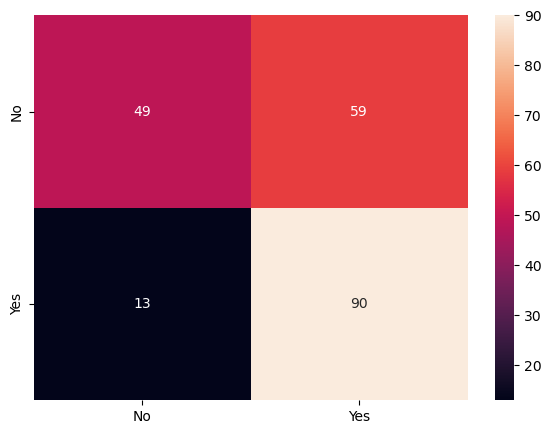

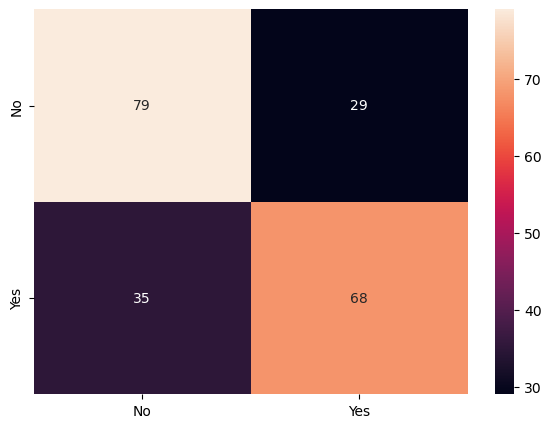

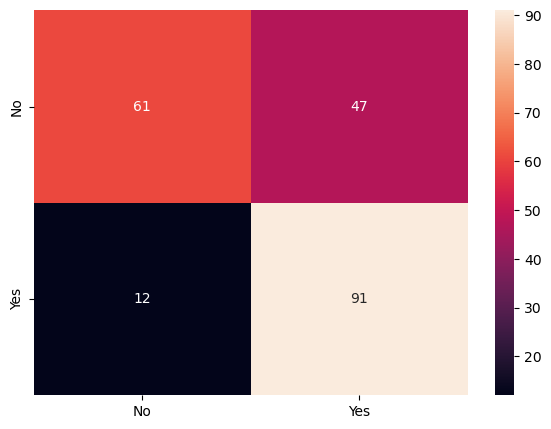

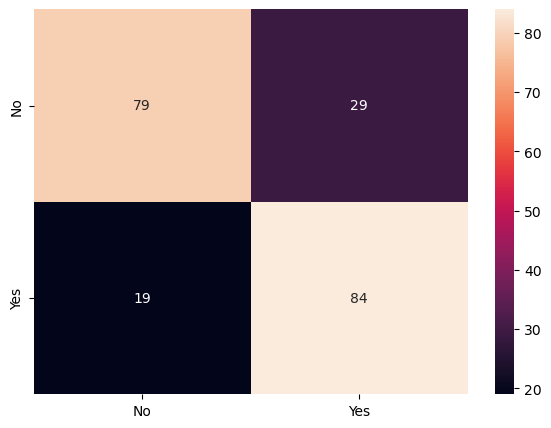

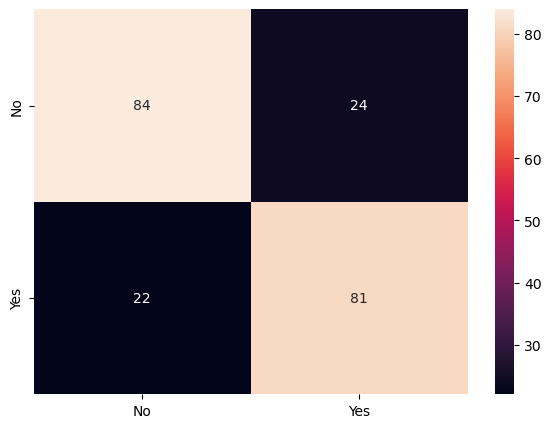

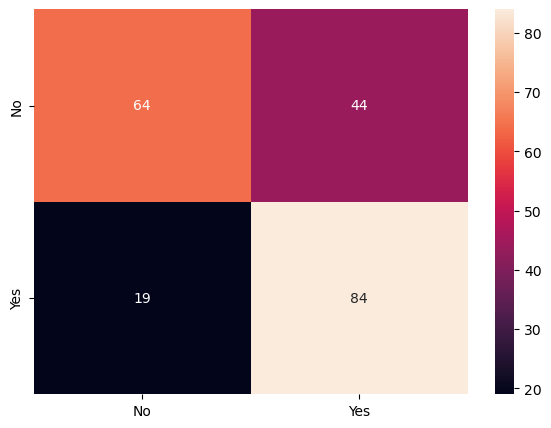

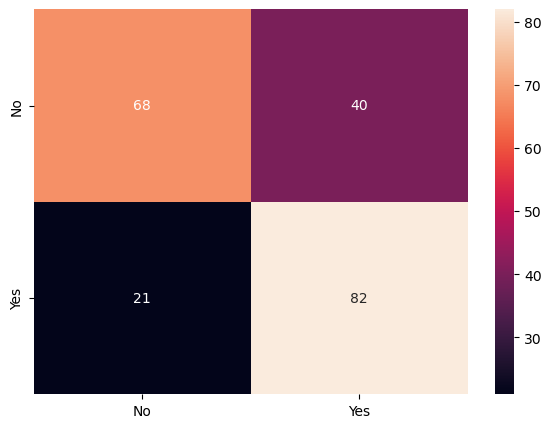

In [204]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    print("\n")

##### 5. Hyperparameter tuning with upsampled data

1. With Original Data --> Logistic Regression at 83% accuracy
2. With Scaled Data --> Logistic Regression & SVM at 83%
3. With Upsampled & Downsampled Data the accuracy has surprisingly gone down

Considering SVM with scaled data for CV & Tuning

In [212]:
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)


In [216]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
svm_model = SVC(random_state=0)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],       # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']   # Kernel coefficient
}

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',  # Use 'f1', 'precision', 'recall', etc., if needed
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1
)

# Perform grid search
grid_search_svm.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Score:", grid_search_svm.best_score_)

# Evaluate the best model on the test data
best_svm_model = grid_search_svm.best_estimator_
y_test_pred = best_svm_model.predict(X_test)

# Metrics for test set
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8043478260869564
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154

Confusion Matrix:
[[ 19  24]
 [  2 109]]


In [ ]:
After all possible experiments Maximum accuracy achieved By making data balanced as Up Sampling. Surprisingly only Random forest performed well in that state of the data.

Surprisingly feature selection doesn't make increase in accuracy.